# Tarea 3: Líquidos y Sólidos Bidimensionales

## Sección A1

**Programa 1**

/home/santiago/anaconda3/envs/fisica-estadistica/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


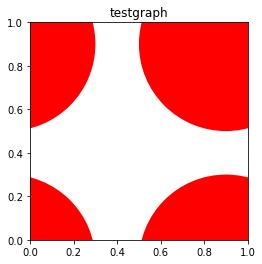

In [1]:
import pylab
def show_conf(L, sigma, title, fname):
	pylab.axes()
	for [x,y] in L:
		for ix in range(-1,2):
			for iy in range(-1,2):
				cir = pylab.Circle((x + ix, y + iy), radius = sigma, fc = "r")
				pylab.gca().add_patch(cir)
	
	pylab.axis("scaled")
	pylab.title(title)
	pylab.axis([0.0, 1.0, 0.0, 1.0])
	pylab.savefig(fname)
	pylab.show()
	pylab.close()

L = [[0.9,0.9]]
sigma = 0.4
show_conf(L, sigma, "testgraph", "onedisk.png")

#### **Pregunta 1**: ¿Cuál objeto geométrico dibuja?

La figura geométrica es un cículo.

#### **Pregunta 2**: ¿Cuál es el color del objeto y en dónde es que se especifica?

El color es rojo y se especifica en la línea 7:

In [ ]:
cir = pylab.Circle((x + ix, y + iy), radius = sigma, fc = "r") #fc = color

El parametro fc setea el color del objeto.

#### Pregunta 3: ¿Cómo se implementa las condiciones periódicas de contorno?

?

#### Pregunta 4: ¿Qué hace que usted lo pueda ver en la pantalla de la computadora?

In [4]:
pylab.show() #se encarga de montrar el gráfico

#### Pregunta 5: ¿Acaso este programa crea un archivo? ¿Cuál es el nombre del archivo? ¿Cómo se puede cambiar?

Sí el programa crea un archivo, en la siguiente línea:

In [ ]:
pylab.savefig(fname) #se encarga de guardar el archivo

El nombre del archivo es **onedisk.png** se declara y se puede cambiar el último parámetro de la función show_conf:

In [ ]:
show_conf(L, sigma, "testgraph", "onedisk.png") #llama la función show_conf

## Sección A2

**Programa 2**

In [ ]:
import os,random

filename = "diskconfiguration.txt"
if os.path.isfile(filename):
	f = open(filename,"r")
	L = []
	for line in f:
		a, b = line.split()
		L.append([float(a), float(b)])
	f.close()
	print "startingfromfile", filename
else:
	L=[]
	for k in range(3):
		L.append([random.uniform(0.0,1.0), random.uniform(0.0,1.0)])
	print "starting from a new random configuration"

L[0][0] = 3.3
f = open(filename,"w")
for a in L:
	f.write(str(a[0]) + " " + str(a[1]) + "\n")
f.close()

#### **Pregunta 1**: ¿Qué hace el test de condición if os.path.isfile(filename)?

Se fija para ver si el archivo **diskconfiguration.txt** ya existe en el directorio.

#### Pregunta 2: ¿Cuál es la diferencia entre f = open(filename, ’r’)" and "f = open(filename, ’w’)?

Ambos abren el archivo, solamente que el primero lo abre para leerlo y el segundo para escribirlo.

#### Pregunta 3: ¿Cuál es el significado de f.write(str(a[0]) + ’  ’ + str(a[1]) + ’\n’)?

Escribe en el archivo el valor de **a** en la primera(**a[0]**) y segunda(**a[1]**) entrada, los escribe como datos de tipo String, en medio de estos incerta un espacio en blanco(**" "**) y finalmente inseta un salto de línea(**"\n"**) para que los siguiente queden en un renglón aparte.

#### Pregunta 4: ¿Cuál es el potencial uso de este programa?

Crear configuraciones iniciales para un programa y cargarlas de nuevo cada vez que se corre.

## Sección B1

**mi_markov_disk.py**

In [6]:
import random, math

def dist(x,y):
    d_x = abs(x[0] - y[0]) % 1.0
    d_x = min(d_x, 1.0 - d_x)
    d_y = abs(x[1] - y[1]) % 1.0
    d_y = min(d_y, 1.0 - d_y)
    return  math.sqrt(d_x**2 + d_y**2)

L = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
sigma = 0.15
sigma_sq = sigma ** 2
delta = 0.1
n_steps = 1000
for steps in range(n_steps):
    a = random.choice(L)
    b = [(a[0] + random.uniform(-delta, delta))%1.0, (a[1] + random.uniform(-delta, delta))%1.0]
    #min_dist = min((b[0] - c[0]) ** 2 + (b[1] - c[1]) ** 2 for c in L if c != a)
    min_dist = min(dist(b, c) for c in L if c != a)
    #box_cond = min(b[0], b[1]) < sigma or max(b[0], b[1]) > 1.0 - sigma
    #if not (box_cond or min_dist < 4.0 * sigma ** 2):
    if not (min_dist < 4.0*sigma**2 ):
        a[:] = b
print L

[[0.0670158877621122, 0.33870296987788473], [0.6152181012951958, 0.05119846953542262], [0.9684981943523313, 0.231682552940837], [0.9047133646147538, 0.09812264393224594]]


## Sección B2

[[0.3153949273445748, 0.7550285229022448], [0.46238144579659846, 0.1885542145751291], [0.9283638795918061, 0.6798811788053899], [0.7619180322712269, 0.1079720354117431]]


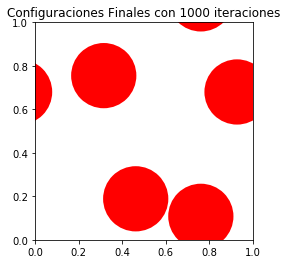

In [3]:
import math, random, pylab
 
def dist(x,y):
    d_x = abs(x[0] - y[0]) % 1.0
    d_x = min(d_x, 1.0 - d_x)
    d_y = abs(x[1] - y[1]) % 1.0
    d_y = min(d_y, 1.0 - d_y)
    return math.sqrt(d_x**2 + d_y**2)
   
def print_final_conf(L, sigma, title, fname):
    pylab.axes()
    for [x, y] in L:
        for ix in range(-1, 2):
            for iy in range(-1, 2):
                cir = pylab.Circle((x + ix, y + iy), radius = sigma,  fc = 'r')
                pylab.gca().add_patch(cir)
    pylab.axis('scaled')
    pylab.title(title)
    pylab.axis([0.0, 1.0, 0.0, 1.0])
    pylab.savefig(fname)
    pylab.show()
   
L = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
sigma = 0.15
delta = 0.1
n_steps = 1000
for steps in range(n_steps):
    a = random.choice(L)
    b = [(a[0] + random.uniform(-delta, delta)) % 1.0,
         (a[1] + random.uniform(-delta, delta)) % 1.0]
    min_dist = min(dist(b, c) for c in L if c != a)
    if min_dist > 2 * sigma:
        a[:] = b
       
print L
print_final_conf(L, sigma, 'Configuraciones Finales con 1000 iteraciones', 'configuraciones_finales_b2.png')

## Sección B3

In [ ]:
import math, os, random, pylab
 
def dist(x, y):

    d_x = abs(x[0] - y[0]) % 1.0
    d_x = min(d_x, 1.0 - d_x)
    d_y = abs(x[1] - y[1]) % 1.0
    d_y = min(d_y, 1.0 - d_y)
    return math.sqrt(d_x**2 + d_y**2)
   
def print_final_conf(L, sigma, title, fname):
    pylab.axes()
    for [x, y] in L:
        for ix in range(-1, 2):
            for iy in range(-1, 2):
                cir = pylab.Circle((x + ix, y + iy), radius = sigma,  fc = 'r')
                pylab.gca().add_patch(cir)
    pylab.axis('scaled')
    pylab.title(title)
    pylab.axis([0.0, 1.0, 0.0, 1.0])
    pylab.savefig(fname)
    pylab.show()
 
N = 256
eta = 0.72 
K = int(math.sqrt(N))
sigma = math.sqrt(eta / (N * math.pi))
delta = 0.1
n_steps = 0
 
filename = "disk_configuration_N %i_eta %.2f.txt"
 
if os.path.isfile(filename):
    f = open(filename, 'r')
    L = []
    for line in f:
        a, b = line.split()
        L.append([float(a), float(b)])
    f.close()
    print "Starting from file", filename
else:
    L = []
    for i in range(K):
        for j in range(K):
            L.append([float(i)/K + 0.5 / K, float(j)/K + 0.5 / K])
    print "Starting from scratch"
 
for steps in range(n_steps):
    a = random.choice(L)
    b = [(a[0] + random.uniform(-delta, delta)) % 1.0,
         (a[1] + random.uniform(-delta, delta)) % 1.0]
    min_dist = min(dist(b, c) for c in L if c != a)
    if min_dist > 2 * sigma:
        a[:] = b
       
print L
 
print_final_conf(L, sigma,'N = %i' % N, 'eta = %i' % eta)
 
f = open(filename, 'w')
for a in L:
    f.write(str(a[0]) + ' ' + str(a[1]) + '\n')
f.close()

![title](b3.png)

**Indique hasta qué valor inicial de la densidad de la red cuadrada es una configuración legal:** Ya más arriba de 0.80 los discos empiezan a traslaparse.

## Sección B4

Añada un gráfico de la configuración inicial.

![title](256_3.png)

Añada un gráfico de la configuración final de la secuencia.

![title](256_4.png)

## Seccion B5

![title](b5_1.png)

In [14]:
[[0.03125, 0.03125], [0.03125, 0.09375], [0.03125, 0.15625], [0.03125, 0.21875], [0.03125, 0.28125], [0.03125, 0.34375], [0.03125, 0.40625], [0.03125, 0.46875], [0.03125, 0.53125], [0.03125, 0.59375], [0.03125, 0.65625], [0.0299777795014, 0.719978518477], [0.03125, 0.78125], [0.03125, 0.84375], [0.03125, 0.90625], [0.03125, 0.96875], [0.09375, 0.03125], [0.09375, 0.09375], [0.09375, 0.15625], [0.09375, 0.21875], [0.09375, 0.28125], [0.09375, 0.34375], [0.09375, 0.40625], [0.09375, 0.46875], [0.09375, 0.53125], [0.09375, 0.59375], [0.09375, 0.65625], [0.09375, 0.71875], [0.09375, 0.78125], [0.09375, 0.84375], [0.09375, 0.90625], [0.09375, 0.96875], [0.15625, 0.03125], [0.15625, 0.09375], [0.15625, 0.15625], [0.15625, 0.21875], [0.15625, 0.28125], [0.15625, 0.34375], [0.15625, 0.40625], [0.15625, 0.46875], [0.15625, 0.53125], [0.15625, 0.59375], [0.15625, 0.65625], [0.15625, 0.71875], [0.15625, 0.78125], [0.15625, 0.84375], [0.15625, 0.90625], [0.15625, 0.96875], [0.21875, 0.03125], [0.21875, 0.09375], [0.21875, 0.15625], [0.21875, 0.21875], [0.21875, 0.28125], [0.21875, 0.34375], [0.21875, 0.40625], [0.21875, 0.46875], [0.21875, 0.53125], [0.21875, 0.59375], [0.21875, 0.65625], [0.21875, 0.71875], [0.21875, 0.78125], [0.21875, 0.84375], [0.21875, 0.90625], [0.21875, 0.96875], [0.28125, 0.03125], [0.28125, 0.09375], [0.28125, 0.15625], [0.28125, 0.21875], [0.28125, 0.28125], [0.28125, 0.34375], [0.28125, 0.40625], [0.28125, 0.46875], [0.28125, 0.53125], [0.28125, 0.59375], [0.28125, 0.65625], [0.28125, 0.71875], [0.28125, 0.78125], [0.28125, 0.84375], [0.28125, 0.90625], [0.28125, 0.96875], [0.34375, 0.03125], [0.34375, 0.09375], [0.34375, 0.15625], [0.34375, 0.21875], [0.34375, 0.28125], [0.34375, 0.34375], [0.345646315532, 0.405711503357], [0.34375, 0.46875], [0.342402230409, 0.532330873808], [0.34375, 0.59375], [0.34375, 0.65625], [0.34375, 0.71875], [0.34375, 0.78125], [0.34375, 0.84375], [0.34375, 0.90625], [0.34375, 0.96875], [0.40625, 0.03125], [0.40625, 0.09375], [0.40625, 0.15625], [0.40625, 0.21875], [0.40625, 0.28125], [0.40625, 0.34375], [0.40625, 0.40625], [0.40625, 0.46875], [0.40625, 0.53125], [0.40625, 0.59375], [0.40625, 0.65625], [0.40625, 0.71875], [0.40625, 0.78125], [0.40625, 0.84375], [0.40625, 0.90625], [0.40625, 0.96875], [0.468793815715, 0.0296391426991], [0.46875, 0.09375], [0.46875, 0.15625], [0.46875, 0.21875], [0.46875, 0.28125], [0.46875, 0.34375], [0.46875, 0.40625], [0.46875, 0.46875], [0.46875, 0.53125], [0.46875, 0.59375], [0.46875, 0.65625], [0.46875, 0.71875], [0.46875, 0.78125], [0.46875, 0.84375], [0.46875, 0.90625], [0.46875, 0.96875], [0.53125, 0.03125], [0.53125, 0.09375], [0.53125, 0.15625], [0.53125, 0.21875], [0.53125, 0.28125], [0.53125, 0.34375], [0.53125, 0.40625], [0.53125, 0.46875], [0.53125, 0.53125], [0.53125, 0.59375], [0.53125, 0.65625], [0.53125, 0.71875], [0.53125, 0.78125], [0.53125, 0.84375], [0.53125, 0.90625], [0.53125, 0.96875], [0.59375, 0.03125], [0.59375, 0.09375], [0.59375, 0.15625], [0.59375, 0.21875], [0.59375, 0.28125], [0.59375, 0.34375], [0.59375, 0.40625], [0.59375, 0.46875], [0.59375, 0.53125], [0.59375, 0.59375], [0.59375, 0.65625], [0.59375, 0.71875], [0.59375, 0.78125], [0.59375, 0.84375], [0.59375, 0.90625], [0.59375, 0.96875], [0.65625, 0.03125], [0.65625, 0.09375], [0.65625, 0.15625], [0.65625, 0.21875], [0.65625, 0.28125], [0.65625, 0.34375], [0.65625, 0.40625], [0.65625, 0.46875], [0.65625, 0.53125], [0.65625, 0.59375], [0.65625, 0.65625], [0.65625, 0.71875], [0.65625, 0.78125], [0.65625, 0.84375], [0.655411503233, 0.906663635639], [0.65625, 0.96875], [0.71875, 0.03125], [0.71875, 0.09375], [0.71875, 0.15625], [0.71875, 0.21875], [0.71875, 0.28125], [0.71875, 0.34375], [0.71875, 0.40625], [0.71875, 0.46875], [0.71875, 0.53125], [0.71875, 0.59375], [0.71875, 0.65625], [0.71875, 0.71875], [0.71875, 0.78125], [0.71875, 0.84375], [0.71875, 0.90625], [0.71875, 0.96875], [0.78125, 0.03125], [0.78125, 0.09375], [0.781158507156, 0.156004084592], [0.78125, 0.21875], [0.78125, 0.28125], [0.78125, 0.34375], [0.78125, 0.40625], [0.78125, 0.46875], [0.78125, 0.53125], [0.78125, 0.59375], [0.78125, 0.65625], [0.78125, 0.71875], [0.78125, 0.78125], [0.78125, 0.84375], [0.78125, 0.90625], [0.78125, 0.96875], [0.84375, 0.03125], [0.84375, 0.09375], [0.84375, 0.15625], [0.84375, 0.21875], [0.84375, 0.28125], [0.84375, 0.34375], [0.84375, 0.40625], [0.84375, 0.46875], [0.84375, 0.53125], [0.84375, 0.59375], [0.84375, 0.65625], [0.84375, 0.71875], [0.84375, 0.78125], [0.84375, 0.84375], [0.84375, 0.90625], [0.84375, 0.96875], [0.90625, 0.03125], [0.90625, 0.09375], [0.90625, 0.15625], [0.90625, 0.21875], [0.90625, 0.28125], [0.90625, 0.34375], [0.90625, 0.40625], [0.90625, 0.46875], [0.90625, 0.53125], [0.90625, 0.59375], [0.90625, 0.65625], [0.90625, 0.71875], [0.90625, 0.78125], [0.90625, 0.84375], [0.90625, 0.90625], [0.90625, 0.96875], [0.96875, 0.03125], [0.96875, 0.09375], [0.96875, 0.15625], [0.96875, 0.21875], [0.96875, 0.28125], [0.96875, 0.34375], [0.96875, 0.40625], [0.96875, 0.46875], [0.96875, 0.53125], [0.96875, 0.59375], [0.96875, 0.65625], [0.96875, 0.71875], [0.96875, 0.78125], [0.96875, 0.84375], [0.96875, 0.90625], [0.96875, 0.96875]]


[[0.03125, 0.03125],
 [0.03125, 0.09375],
 [0.03125, 0.15625],
 [0.03125, 0.21875],
 [0.03125, 0.28125],
 [0.03125, 0.34375],
 [0.03125, 0.40625],
 [0.03125, 0.46875],
 [0.03125, 0.53125],
 [0.03125, 0.59375],
 [0.03125, 0.65625],
 [0.0299777795014, 0.719978518477],
 [0.03125, 0.78125],
 [0.03125, 0.84375],
 [0.03125, 0.90625],
 [0.03125, 0.96875],
 [0.09375, 0.03125],
 [0.09375, 0.09375],
 [0.09375, 0.15625],
 [0.09375, 0.21875],
 [0.09375, 0.28125],
 [0.09375, 0.34375],
 [0.09375, 0.40625],
 [0.09375, 0.46875],
 [0.09375, 0.53125],
 [0.09375, 0.59375],
 [0.09375, 0.65625],
 [0.09375, 0.71875],
 [0.09375, 0.78125],
 [0.09375, 0.84375],
 [0.09375, 0.90625],
 [0.09375, 0.96875],
 [0.15625, 0.03125],
 [0.15625, 0.09375],
 [0.15625, 0.15625],
 [0.15625, 0.21875],
 [0.15625, 0.28125],
 [0.15625, 0.34375],
 [0.15625, 0.40625],
 [0.15625, 0.46875],
 [0.15625, 0.53125],
 [0.15625, 0.59375],
 [0.15625, 0.65625],
 [0.15625, 0.71875],
 [0.15625, 0.78125],
 [0.15625, 0.84375],
 [0.15625, 0.90625]

## Seccion C1